In [236]:
import sys
sys.path.insert(0, '../scripts/')

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from plots import Plots
%matplotlib inline

In [238]:
pwd = os.getcwd()

train_file_path = os.path.join(pwd, os.pardir, "data/train.csv")
test_file_path = os.path.join(pwd, os.pardir, "data/test.csv")
store_file_path = os.path.join(pwd, os.pardir, "data/store.csv")


In [239]:
df_train = pd.read_csv(train_file_path, dtype={'StateHoliday': object}, parse_dates=["Date"])
df_test = pd.read_csv(test_file_path, dtype={'StateHoliday': object}, parse_dates=["Date"])
df_store = pd.read_csv(store_file_path)

In [240]:
df_train_merged = pd.merge(df_train, df_store, how = 'left', on = 'Store')
df_test_merged = pd.merge(df_test, df_store, how = 'left', on = 'Store')

In [245]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [246]:
plt.style.use('seaborn')
# plt.

In [259]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='Month', ylabel='Promo'>

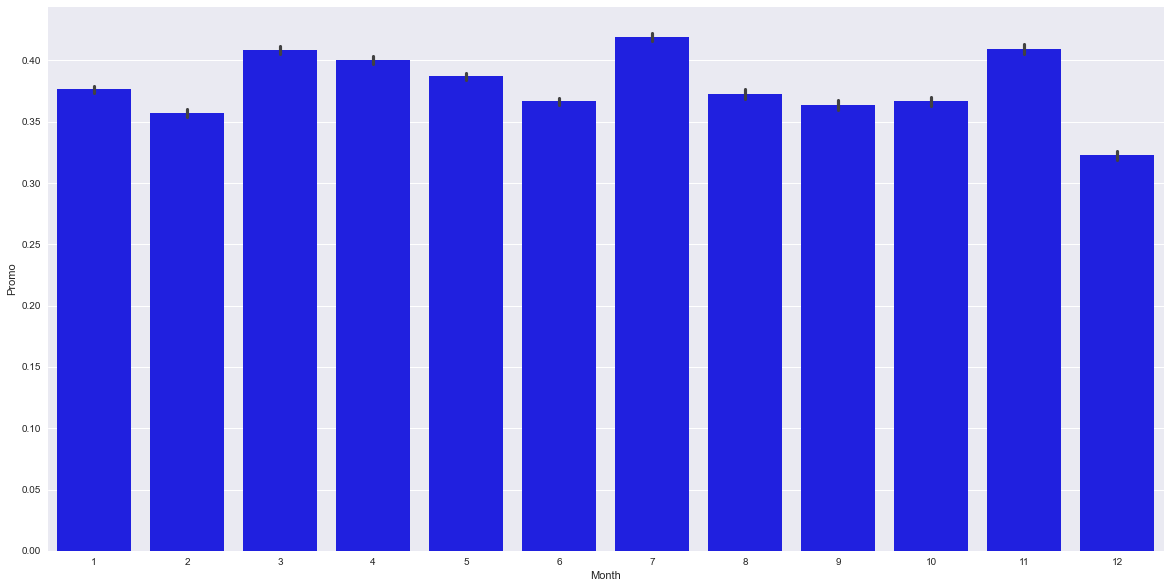

In [286]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="Month", y="Promo", data=df_train, color="Blue", ax=ax)

In [260]:
df_train["Promo"].describe()

count    1.017209e+06
mean     3.815145e-01
std      4.857586e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Promo, dtype: float64

<AxesSubplot:title={'center':'Test set'}, ylabel='Frequency'>

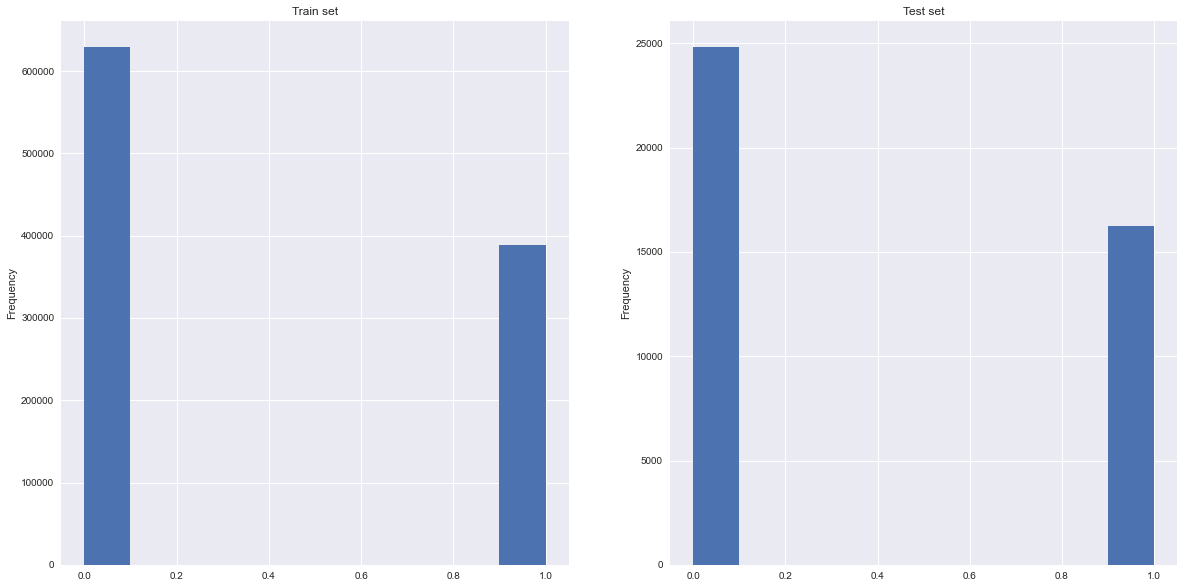

In [244]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
df_train["Promo"].plot(kind="hist", figsize=(20, 10), ax=ax1, title="Train set")
df_test["Promo"].plot(kind="hist", figsize=(20, 10), ax=ax2, title="Test set")

Both the train set and the test set have similar distribution

In [261]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [262]:
df_train["Day"] = df_train["Date"].dt.day
df_train["Month"] = df_train["Date"].dt.month
df_train["Year"] = df_train["Date"].dt.year


In [263]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015


In [264]:
sales_during_holiday = df_train.loc[(df_train["StateHoliday"] == "0")]

In [265]:
sales_during_holiday.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015


<AxesSubplot:xlabel='Date'>

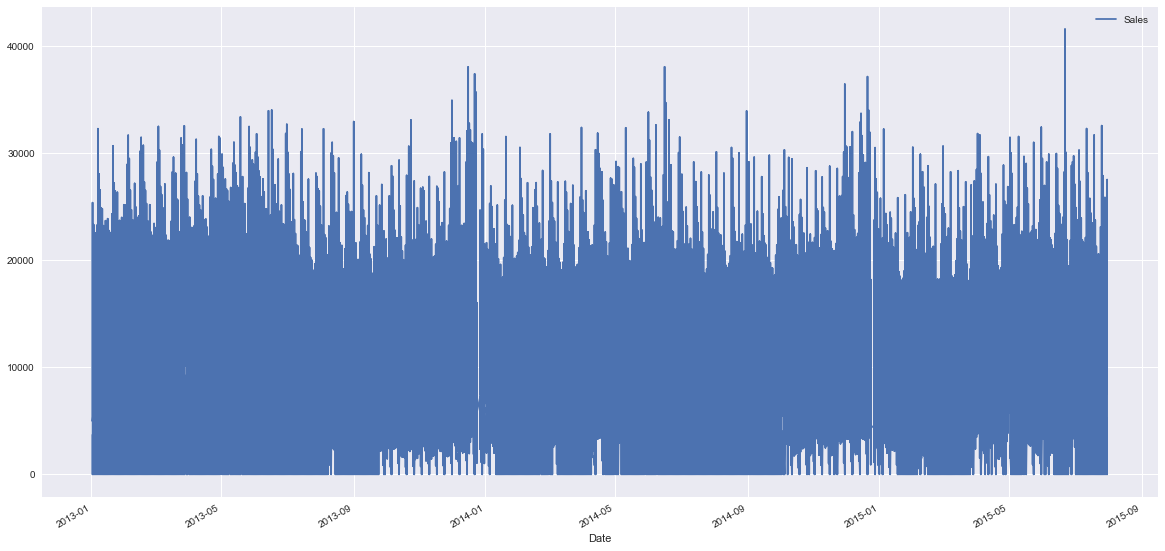

In [268]:
sales_during_holiday.plot(x="Date", y="Sales", figsize=(20, 10))

In [177]:
seasonal_purchases = df_train.loc[(df_train["StateHoliday"] != "0") & (df_train["StateHoliday"] != "a") & (df_train["Open"] == 1)]

In [178]:
seasonal_purchases.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
129424,85,1,2015-04-06,11675,1706,1,0,b,1,6,4,2015
129461,122,1,2015-04-06,3651,485,1,0,b,1,6,4,2015
129548,209,1,2015-04-06,1419,145,1,0,b,1,6,4,2015
129598,259,1,2015-04-06,17466,3134,1,0,b,1,6,4,2015
129601,262,1,2015-04-06,33655,5152,1,0,b,0,6,4,2015


<AxesSubplot:>

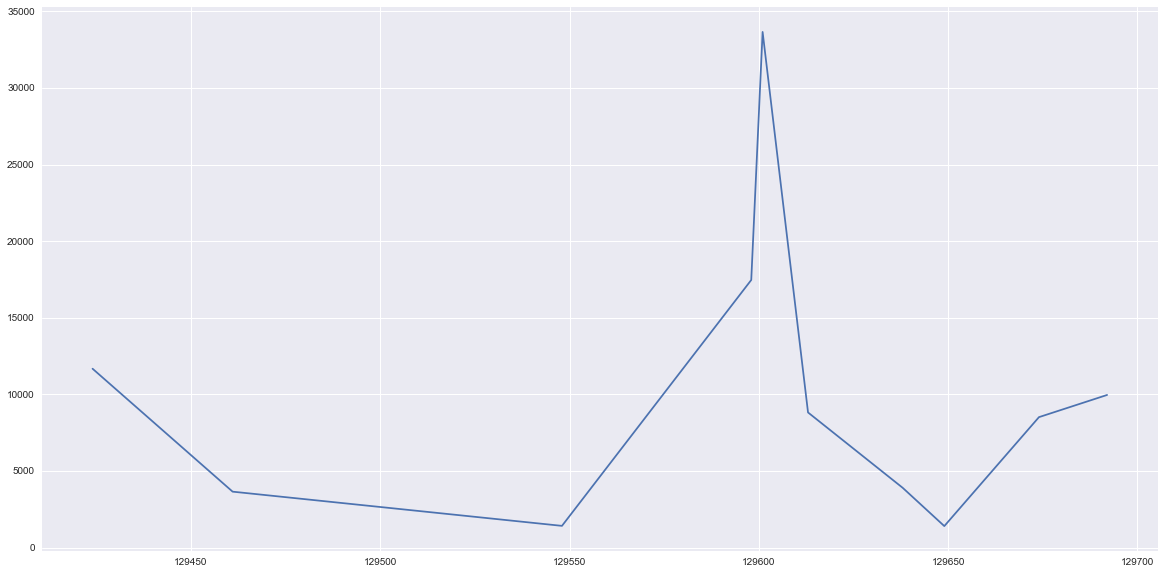

In [179]:
seasonal_purchases["Sales"][:10].plot(figsize=(20, 10))

In [269]:
df_train.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Day,Month,Year
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,0.000023,0.001467,0.000290
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,0.005136,-0.005362,0.001937
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.011612,0.048768,0.023519
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.004473,0.038179,-0.001212
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.033428,-0.000681,-0.001009
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,-0.108325,-0.011747,0.024300
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,0.030538,0.103282,-0.036535
Day,0.000023,0.005136,-0.011612,-0.004473,0.033428,-0.108325,0.030538,1.000000,0.012442,-0.002485
Month,0.001467,-0.005362,0.048768,0.038179,-0.000681,-0.011747,0.103282,0.012442,1.000000,-0.269382
Year,0.000290,0.001937,0.023519,-0.001212,-0.001009,0.024300,-0.036535,-0.002485,-0.269382,1.000000


<AxesSubplot:>

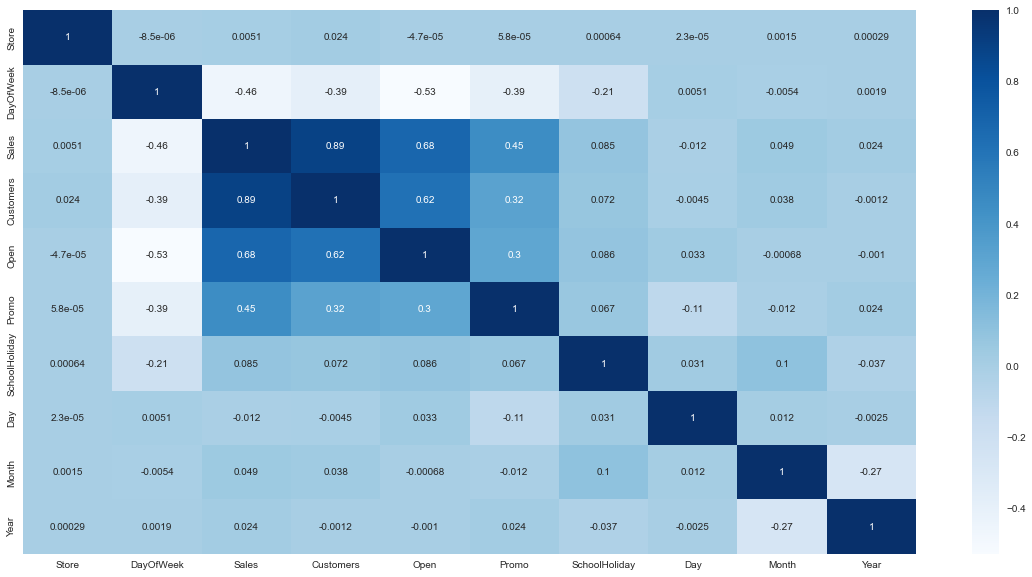

In [270]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data=df_train.corr(), cmap="Blues", ax=ax, annot=True)

Sales and Number of customers are highly correlated as expected

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

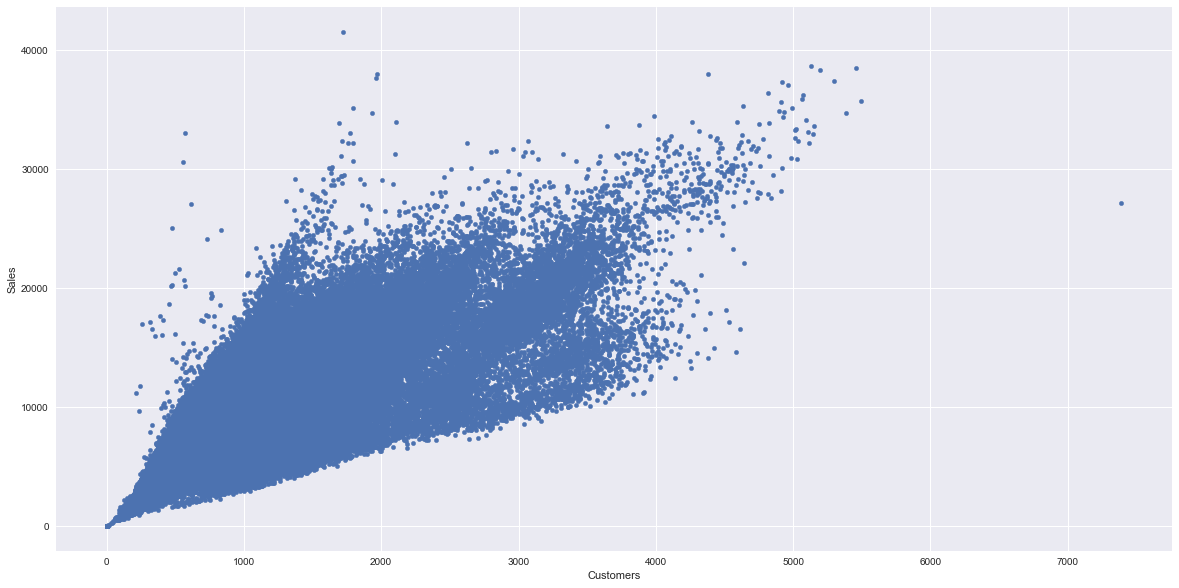

In [273]:
df_train.plot(kind="scatter", x="Customers", y="Sales", figsize=(20, 10))

In [184]:
from datetime import datetime, timedelta

In [186]:
x = datetime(2015, 8, 1) - timedelta(1)

(x.day, x.month, x.year)

(31, 7, 2015)

In [187]:
def calculatePreviousDay(row):
    date_object = datetime(row["Year"], row["Month"], row["Day"]) - timedelta(1)
    return date_object.day

def calculatePreviousMonth(row):
    date_object = datetime(row["Year"], row["Month"], row["Day"]) - timedelta(1)
    return date_object.month

def calculatePreviousYear(row):
    date_object = datetime(row["Year"], row["Month"], row["Day"]) - timedelta(1)
    return date_object.year

In [188]:
df_train["Previous Day"] = df_train.apply(calculatePreviousDay, axis=1)

In [189]:
df_train["Previous Month"] = df_train.apply(calculatePreviousMonth, axis=1)

In [190]:
df_train["Previous Year"] = df_train.apply(calculatePreviousYear, axis=1)

In [191]:
df_train.loc[df_train["StateHoliday"] == "a"][["Sales", "Previous Day", "Previous Month", "Previous Year"]]

,Sales,Previous Day,Previous Month,Previous Year
63555,0,3,6,2015
63557,0,3,6,2015
63559,5807,3,6,2015
63560,5749,3,6,2015
63563,0,3,6,2015
...,...,...,...,...
1017204,0,31,12,2012
1017205,0,31,12,2012
1017206,0,31,12,2012
1017207,0,31,12,2012


In [193]:
df_train.loc[(df_train["StateHoliday"] == "b") | (df_train["StateHoliday"] == "c")]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Previous Day,Previous Month,Previous Year
129340,1,1,2015-04-06,0,0,0,0,b,1,6,4,2015,5,4,2015
129341,2,1,2015-04-06,0,0,0,0,b,1,6,4,2015,5,4,2015
129342,3,1,2015-04-06,0,0,0,0,b,1,6,4,2015,5,4,2015
129343,4,1,2015-04-06,0,0,0,0,b,1,6,4,2015,5,4,2015
129344,5,1,2015-04-06,0,0,0,0,b,1,6,4,2015,5,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920200,1111,5,2013-03-29,0,0,0,1,b,1,29,3,2013,28,3,2013
920201,1112,5,2013-03-29,0,0,0,1,b,1,29,3,2013,28,3,2013
920202,1113,5,2013-03-29,0,0,0,1,b,1,29,3,2013,28,3,2013
920203,1114,5,2013-03-29,0,0,0,1,b,0,29,3,2013,28,3,2013


In [201]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Previous Day,Previous Month,Previous Year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,30,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,30,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,30,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,30,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,30,7,2015


<AxesSubplot:xlabel='Date'>

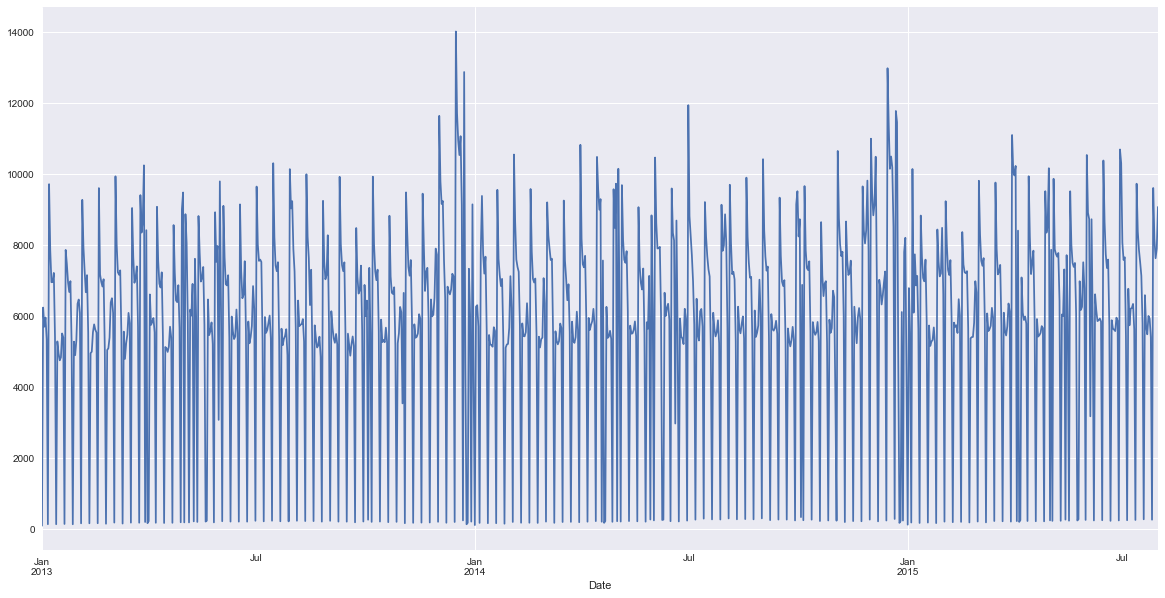

In [275]:
df_train.set_index('Date')["Sales"].resample('D').mean().plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

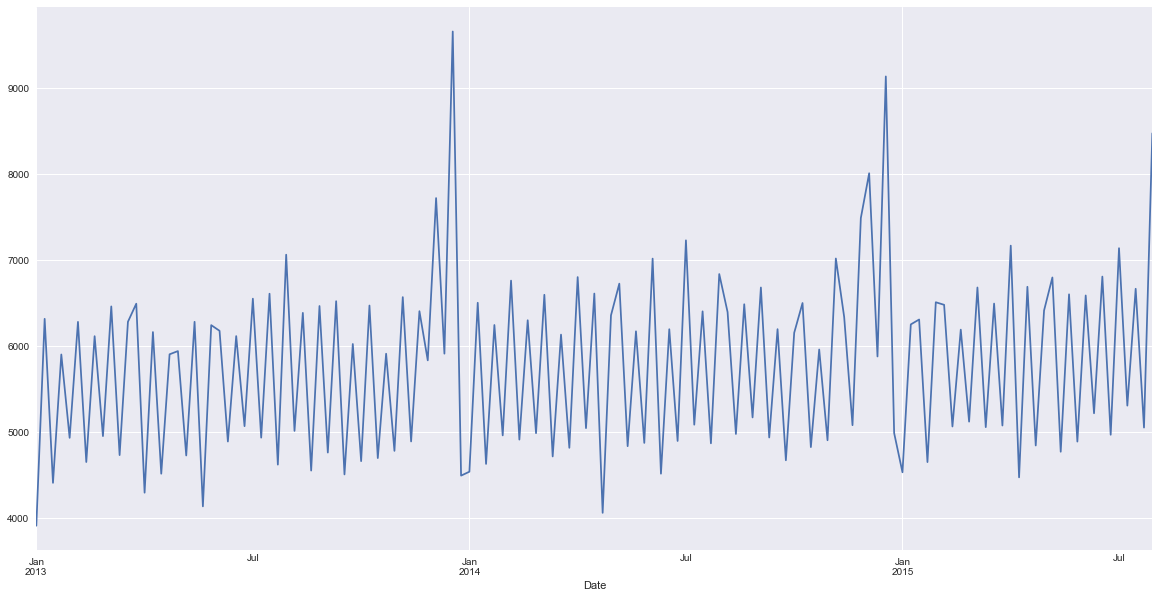

In [277]:
df_train.set_index('Date')["Sales"].resample('W').mean().plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

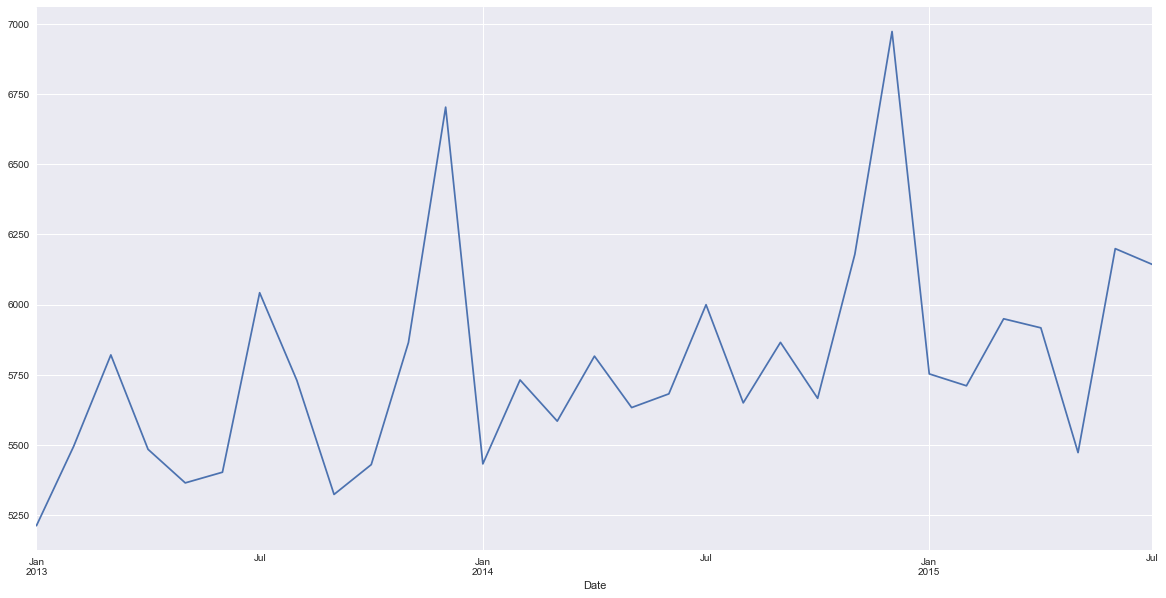

In [278]:
df_train.set_index('Date')["Sales"].resample('M').mean().plot(figsize=(20, 10))